<a href="https://colab.research.google.com/github/JuanBustamante107517/Lab_08_Bustamante_G/blob/main/LAB09.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **LAB:09**

### **a. Mediante la base a datos de cáncer de mama alojada en el repositorio UCI Machine Learning Repository (https://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+%28original%29) y utilizando la librería de Python scikit-learn, cree una red neuronal para clasificar a un paciente como canceroso o no canceroso de tal forma que obtenga el mayor valor de accuracy. Para ello, debe realizar el preprocesamiento de la información e ir ajustando la red neuronal con los parámetros requeridos como la cantidad de capas ocultas y neuronas por cada capa oculta, el número de iteraciones, la función de activación, el método para minimizar la función de error, entre otros.**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [ ]:
df = pd.read_csv('/content/cancer.csv')
#Exploramos la data
print(df.head())
print(df.info())

   Unnamed: 0  ClumpThick  UnifCellSize  UnifCellShape  MargAdh  \
0           0           5             1              1        1   
1           1           5             4              4        5   
2           2           3             1              1        1   
3           3           6             8              8        1   
4           4           4             1              1        3   

   SingEpiCellSize  BareNuclei  BlandChromatin  NormalNucleoli  Mitoses  Class  
0                2           1               3               1        1      0  
1                7          10               3               2        1      0  
2                2           2               3               1        1      0  
3                3           4               3               7        1      0  
4                2           1               3               1        1      0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   C

In [ ]:
# Eliminamos columnas que no son necesesarias
if 'Unnamed: 0' in df.columns:
    df = df.drop(['Unnamed: 0'], axis=1)

In [ ]:
# Revisamos
print("Valores únicos en 'Class':", df['Class'].unique())

Valores únicos en 'Class': [0 1]


In [ ]:
# Separar variables predictoras y etiqueta
X = df.drop('Class', axis=1)
y = df['Class']

In [ ]:
# Dividir en datos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Normalizar los datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Crear y entrenar la red neuronal
mlp = MLPClassifier(
    hidden_layer_sizes=(30, 30, 30),
    max_iter=1000,
    activation='relu',
    solver='adam',
    random_state=42
)

mlp.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(30, 30, 30), max_iter=1000, random_state=42)

In [ ]:
# Evaluación del modelo
y_pred = mlp.predict(X_test)

print("Precisión (Accuracy):", accuracy_score(y_test, y_pred))
print("\nMatriz de Confusión:")
print(confusion_matrix(y_test, y_pred))
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred))

Precisión (Accuracy): 0.9428571428571428

Matriz de Confusión:
[[93  2]
 [ 6 39]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.94      0.98      0.96        95
           1       0.95      0.87      0.91        45

    accuracy                           0.94       140
   macro avg       0.95      0.92      0.93       140
weighted avg       0.94      0.94      0.94       140



### **b. Tome la base de datos llamada ‘Fashion MNIST’ (https://github.com/zalandoresearch/fashion-mnist) la cual consiste de 60 000 fotos (28×28 pixeles por cada imagen) de prendas de ropa e importándola directamente desde keras, cree una red neuronal convolucional que sirva para clasificar las imágenes respecto al tipo de ropa mostrado (10 tipos distintos de artículos) de tal forma que se obtenga el mayor valor de accuracy. Para ello, deberá ir ajustando la red neuronal con los parámetros requeridos como la cantidad de capas ocultas y neuronas por cada capa oculta, el número de iteraciones, la función de activación, el método para minimizar la función de error, entre otros.**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical

In [ ]:
# Cargar los datos desde Keras
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# Explorar los datos
print("Tamaño del set de entrenamiento:", x_train.shape)
print("Tamaño del set de prueba:", x_test.shape)
print("Clases posibles:", np.unique(y_train))

Tamaño del set de entrenamiento: (60000, 28, 28)
Tamaño del set de prueba: (10000, 28, 28)
Clases posibles: [0 1 2 3 4 5 6 7 8 9]


In [ ]:
# Preprocesamiento
# Normalizar los pixeles (de 0-255 a 0-1)
x_train = x_train / 255.0
x_test = x_test / 255.0

# Redimensionar para incluir el canal (grises, 1 canal)
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# One-hot encoding de las etiquetas
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

In [ ]:
# Crear la red neuronal convolucional
model = models.Sequential()

# Capa convolucional + max pooling
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))

# Segunda capa convolucional
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Tercera capa convolucional (opcional pero mejora performance)
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Aplanamiento y capas densas
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.3))  # Previene overfitting
model.add(layers.Dense(10, activation='softmax'))  # 10 clases


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Compilar el modelo
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
# Entrenamos el modelo
history = model.fit(x_train, y_train_cat, epochs=10, batch_size=64,
                    validation_split=0.1, verbose=2)

Epoch 1/10
844/844 - 51s - 61ms/step - accuracy: 0.7782 - loss: 0.6034 - val_accuracy: 0.8403 - val_loss: 0.4146
Epoch 2/10
844/844 - 44s - 52ms/step - accuracy: 0.8659 - loss: 0.3760 - val_accuracy: 0.8818 - val_loss: 0.3177
Epoch 3/10
844/844 - 80s - 94ms/step - accuracy: 0.8821 - loss: 0.3248 - val_accuracy: 0.8928 - val_loss: 0.2904
Epoch 4/10
844/844 - 83s - 98ms/step - accuracy: 0.8951 - loss: 0.2909 - val_accuracy: 0.8963 - val_loss: 0.2770
Epoch 5/10
844/844 - 94s - 111ms/step - accuracy: 0.9030 - loss: 0.2671 - val_accuracy: 0.9038 - val_loss: 0.2591
Epoch 6/10
844/844 - 69s - 82ms/step - accuracy: 0.9090 - loss: 0.2466 - val_accuracy: 0.9085 - val_loss: 0.2518
Epoch 7/10
844/844 - 44s - 52ms/step - accuracy: 0.9155 - loss: 0.2301 - val_accuracy: 0.9048 - val_loss: 0.2614
Epoch 8/10
844/844 - 42s - 50ms/step - accuracy: 0.9209 - loss: 0.2135 - val_accuracy: 0.9168 - val_loss: 0.2308
Epoch 9/10
844/844 - 84s - 100ms/step - accuracy: 0.9266 - loss: 0.1975 - val_accuracy: 0.9148 

In [ ]:
# Evaluamos el modelo
test_loss, test_acc = model.evaluate(x_test, y_test_cat)
print("\nPrecisión en el conjunto de prueba:", test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9044 - loss: 0.2668

Precisión en el conjunto de prueba: 0.9050999879837036


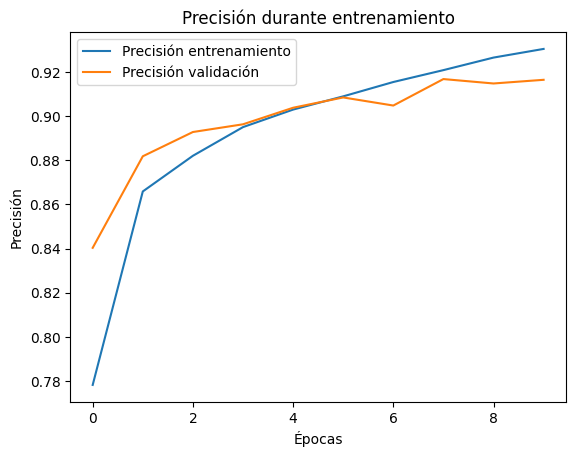

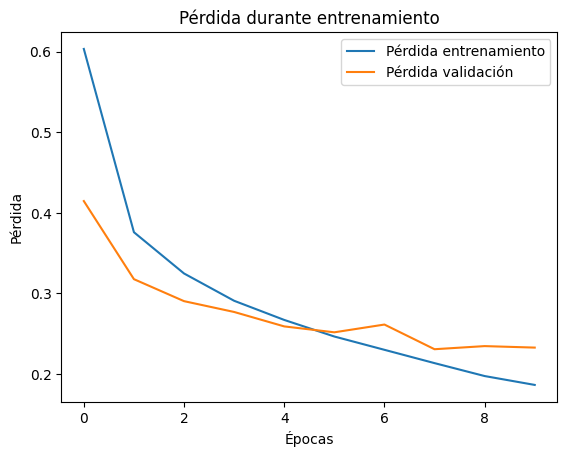

In [ ]:
#  Visualizar precisión y pérdida
plt.plot(history.history['accuracy'], label='Precisión entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.title('Precisión durante entrenamiento')
plt.show()

plt.plot(history.history['loss'], label='Pérdida entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.title('Pérdida durante entrenamiento')
plt.show()